<a href="https://colab.research.google.com/github/Abiliger/IAVD_lab/blob/main/lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Імпорт бібліотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from sklearn.datasets import load_wine
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from google.colab import files

In [ ]:
wine = load_wine()
df_wine = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df_wine['target'] = wine.target
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
# Вибір ознаки
feature = 'alcohol'

# Тест Шапіро-Уілка
stat, p_value = stats.shapiro(df_wine[feature])

print(f"Шапіро-Уілк тест для '{feature}':")
print(f"Статистика: {stat:.4f}")
print(f"p-значення: {p_value:.4f}")

# Інтерпретація
alpha = 0.05
if p_value > alpha:
    print("Дані мають нормальний розподіл (не відхиляємо H₀)")
else:
    print("Дані не мають нормального розподілу (відхиляємо H₀)")

Shapiro-Wilk test для 'alcohol':
- Статистика: 0.9818
- p-значення: 0.0200
 Дані не мають нормального розподілу (відхиляємо H₀)


In [ ]:
# Вибір ознаки
feature = 'malic_acid'

# Тест Шапіро-Уілка
stat, p_value = stats.shapiro(df_wine[feature])

print(f"Шапіро-Уілк тест для '{feature}':")
print(f"Статистика: {stat:.4f}")
print(f"p-значення: {p_value:.4f}")

# Інтерпретація
alpha = 0.05
if p_value > alpha:
    print("Дані мають нормальний розподіл (не відхиляємо H₀)")
else:
    print("Дані не мають нормального розподілу (відхиляємо H₀)")

Shapiro-Wilk test для 'malic_acid':
- Статистика: 0.8888
- p-значення: 0.0000
Дані не мають нормального розподілу (відхиляємо H₀)


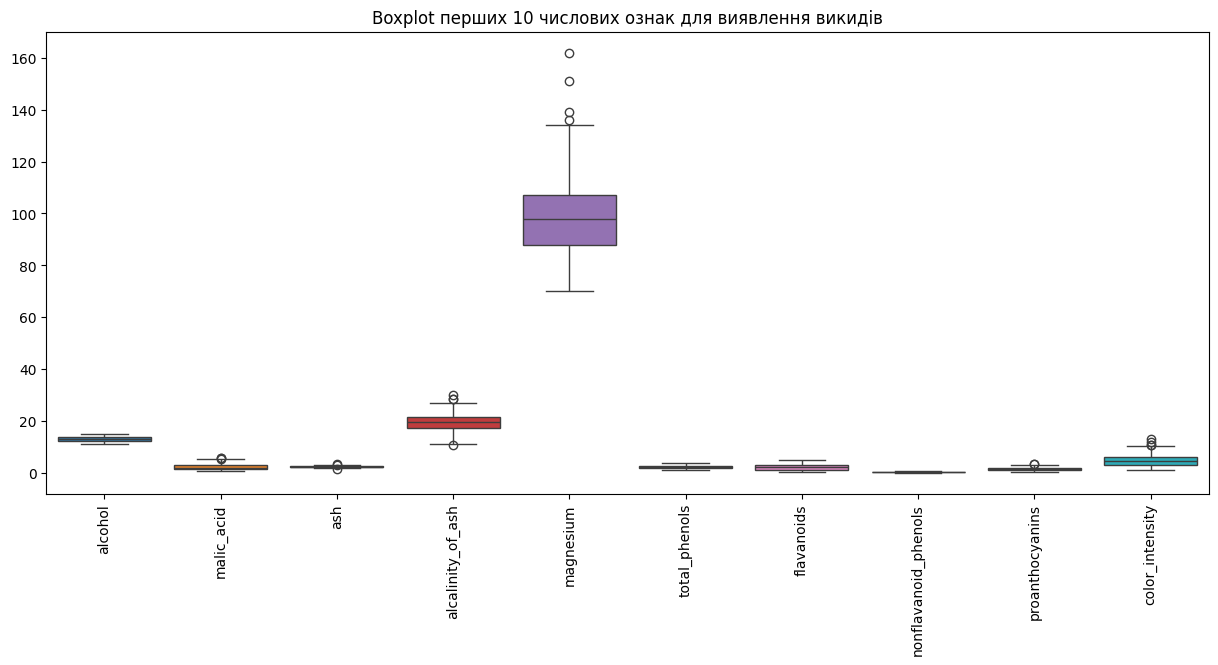

In [ ]:
numeric_cols = df_wine.select_dtypes(include=['number']).columns[:10]
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_wine[numeric_cols])
plt.xticks(rotation=90)
plt.title("Boxplot перших 10 числових ознак для виявлення викидів")
plt.show()

In [ ]:
# Univariate Analysis of Variance (ANOVA) для однієї ознаки по класам
categorical_variable = 'target'
continuous_variable = 'alcohol'
groups = [df_wine[df_wine[categorical_variable] == category][continuous_variable]
          for category in df_wine[categorical_variable].unique()]

f_statistic, p_value = stats.f_oneway(*groups)
alpha = 0.05

if p_value < alpha:
    print("Є суттеві відмінності")
else:
    print("Відсутні суттеві відмінності між групами")

Є суттеві відмінності


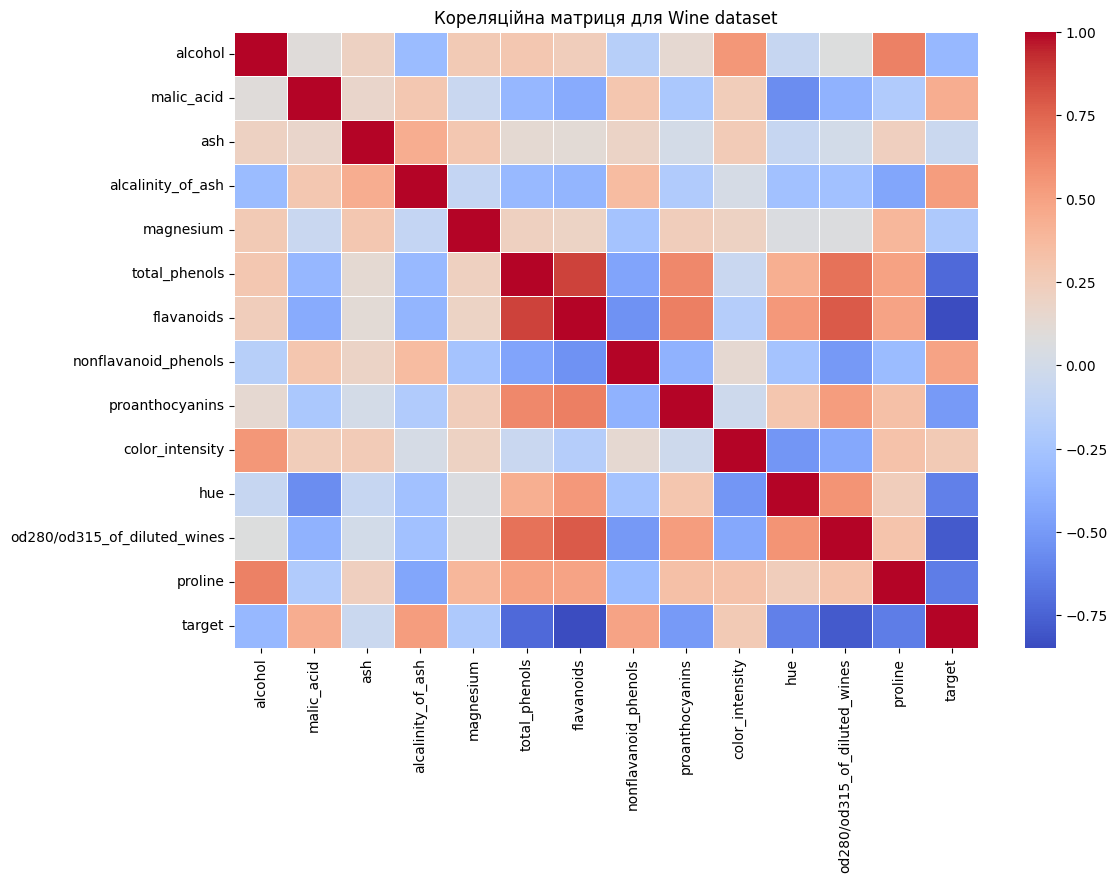

In [ ]:
# Кореляційна матриця
plt.figure(figsize=(12, 8))
sns.heatmap(df_wine.corr(), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Кореляційна матриця для Wine dataset")
plt.show()

In [ ]:
# Кореляція Спірмана для перших двох ознак
feature_x = df_wine.columns[0]  # alcohol
feature_y = df_wine.columns[1]  # malic_acid

spearman_corr, _ = stats.spearmanr(df_wine[feature_x], df_wine[feature_y])

print(f"Кореляція Спірмана ({feature_x} vs {feature_y}): {spearman_corr:.4f}")

Кореляція Спірмана (alcohol vs malic_acid): 0.1404


In [ ]:
# Лінійна регресія alcohol → malic_acid
X = df_wine[feature_x].values.reshape(-1, 1)
y = df_wine[feature_y].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
F_stat, p_val = stats.f_oneway(y_test, y_pred)

print("*Оцінка моделі:")
print(f"Коєфіцієнт детермінації - R²: {r2:.4f}")
print(f"Середньокрадратична похибка - MSE: {mse:.4f}")
print(f"F-критерій Фішера: {F_stat:.4f}, p-значення: {p_val:.4f}")

* Оцінка моделі:
Коєфіцієнт детермінації - R²: -0.0046
Середньокрадратична похибка - MSE: 0.9883
- F-критерій Фішера: 1.3078, p-значення: 0.2567


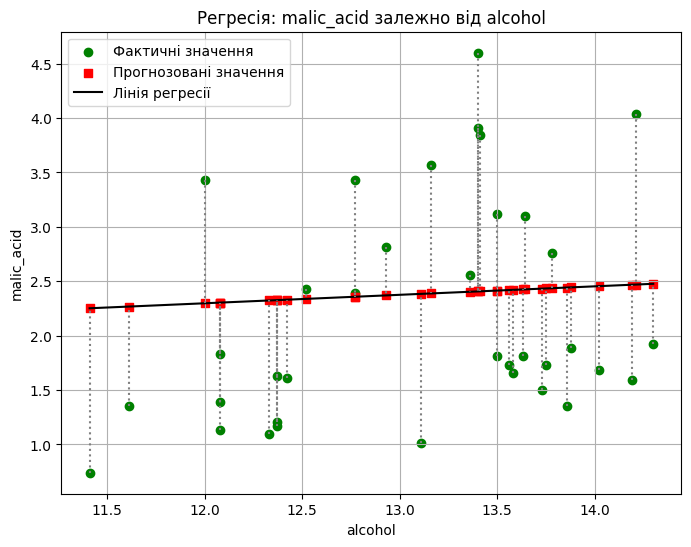

In [ ]:
# Візуалізація регресії
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='green', label='Фактичні значення')
plt.scatter(X_test, y_pred, color='red', marker='s', label='Прогнозовані значення')

x_line = np.linspace(min(X_test), max(X_test), 100).reshape(-1, 1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, color='black', label='Лінія регресії')

for i in range(len(y_test)):
    plt.plot([X_test[i], X_test[i]], [y_test[i], y_pred[i]], color='gray', linestyle='dotted')

plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title(f"Регресія: {feature_y} залежно від {feature_x}")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Завантаження датасету Healthcare Diabetse
uploaded = files.upload()
df_healthcare = pd.read_csv("Healthcare-Diabetes.csv")
df_healthcare.head()

Saving Healthcare-Diabetes.csv to Healthcare-Diabetes.csv


,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Вибір ознаки
feature = 'Glucose'

# Тест Шапіро-Уілка
stat, p_value = stats.shapiro(df_healthcare[feature])

print(f"Шапіро-Уілк тест для '{feature}':")
print(f"Статистика: {stat:.4f}")
print(f"p-значення: {p_value:.4f}")

# Інтерпретація
alpha = 0.05
if p_value > alpha:
    print("Дані мають нормальний розподіл (не відхиляємо H₀)")
else:
    print("Дані не мають нормального розподілу (відхиляємо H₀)")

Шапіро-Уілк тест для 'Glucose':
Статистика: 0.9702
p-значення: 0.0000
Дані не мають нормального розподілу (відхиляємо H₀)


In [ ]:
# Вибір ознаки
feature = 'DiabetesPedigreeFunction'

# Тест Шапіро-Уілка
stat, p_value = stats.shapiro(df_healthcare[feature])

print(f"Шапіро-Уілк тест для '{feature}':")
print(f"Статистика: {stat:.4f}")
print(f"p-значення: {p_value:.4f}")

# Інтерпретація
alpha = 0.05
if p_value > alpha:
    print("Дані мають нормальний розподіл (не відхиляємо H₀)")
else:
    print("Дані не мають нормального розподілу (відхиляємо H₀)")

Шапіро-Уілк тест для 'DiabetesPedigreeFunction':
Статистика: 0.8446
p-значення: 0.0000
Дані не мають нормального розподілу (відхиляємо H₀)


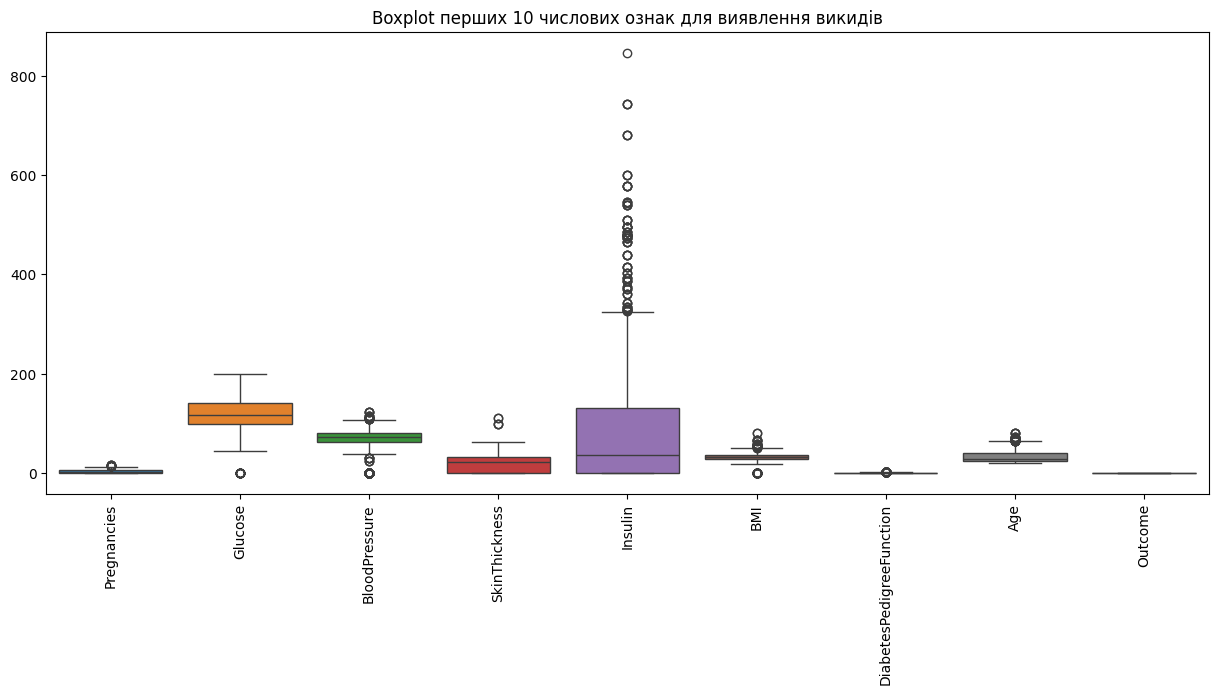

In [ ]:
numeric_cols = df_healthcare.select_dtypes(include=['number']).columns[1:11]
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_healthcare[numeric_cols])
plt.xticks(rotation=90)
plt.title("Boxplot перших 10 числових ознак для виявлення викидів")
plt.show()

In [ ]:
# Univariate Analysis of Variance (ANOVA) для однієї ознаки по класам
categorical_variable = 'Outcome'
continuous_variable = 'Glucose'
groups = [df_healthcare[df_healthcare[categorical_variable] == category][continuous_variable]
          for category in df_healthcare[categorical_variable].unique()]

f_statistic, p_value = stats.f_oneway(*groups)
alpha = 0.05

if p_value < alpha:
    print("Є суттеві відмінності")
else:
    print("Відсутні суттеві відмінності між групами")

Є суттеві відмінності


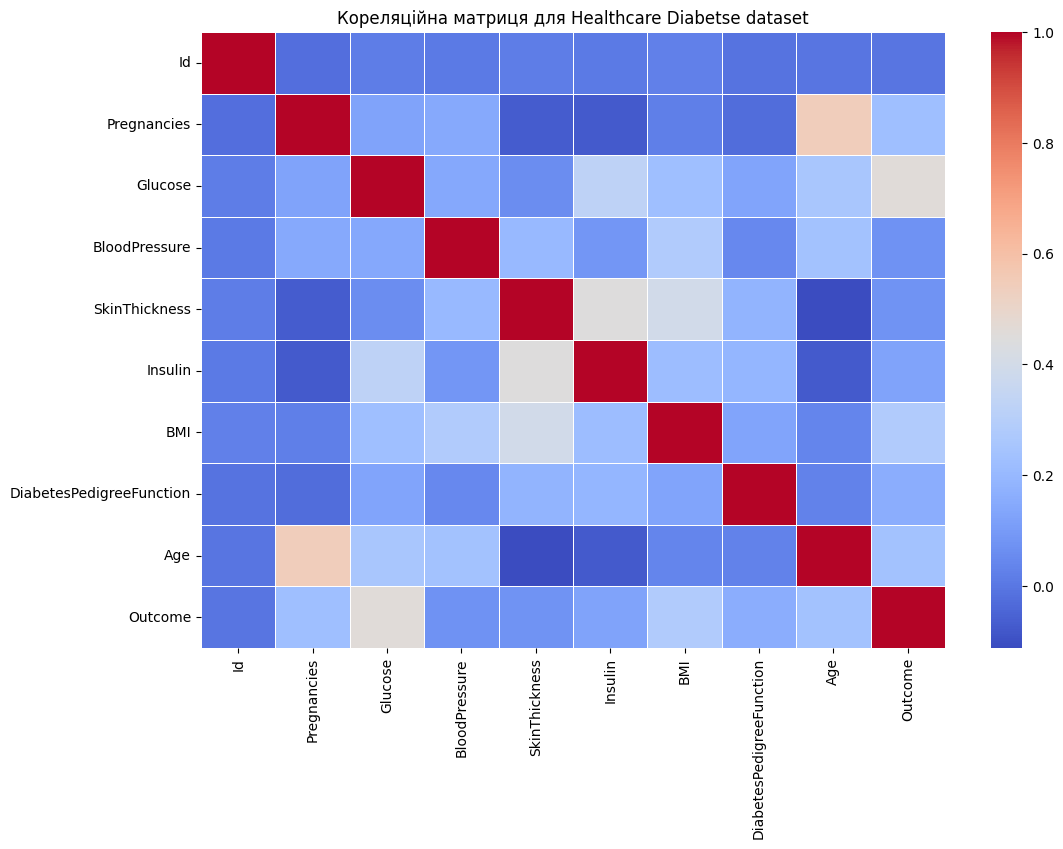

In [ ]:
# Кореляційна матриця
plt.figure(figsize=(12, 8))
sns.heatmap(df_healthcare.corr(), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Кореляційна матриця для Healthcare Diabetse dataset")
plt.show()

In [ ]:
# Кореляція Спірмана для перших двох ознак
feature_x = df_healthcare.columns[2]  # Glucose
feature_y = df_healthcare.columns[7]  # DiabetesPedigreeFunction

spearman_corr, _ = stats.spearmanr(df_healthcare[feature_x], df_healthcare[feature_y])

print(f"Кореляція Спірмана ({feature_x} vs {feature_y}): {spearman_corr:.4f}")

Кореляція Спірмана (Glucose vs DiabetesPedigreeFunction): 0.0773


In [ ]:
# Лінійна регресія Glucose → DiabetesPedigreeFunction
X = df_healthcare[feature_x].values.reshape(-1, 1)
y = df_healthcare[feature_y].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
F_stat, p_val = stats.f_oneway(y_test, y_pred)

print("*Оцінка моделі:")
print(f"Коєфіцієнт детермінації - R²: {r2:.4f}")
print(f"Середньокрадратична похибка - MSE: {mse:.4f}")
print(f"F-критерій Фішера: {F_stat:.4f}, p-значення: {p_val:.4f}")

*Оцінка моделі:
Коєфіцієнт детермінації - R²: 0.0117
Середньокрадратична похибка - MSE: 0.0964
F-критерій Фішера: 0.8876, p-значення: 0.3463


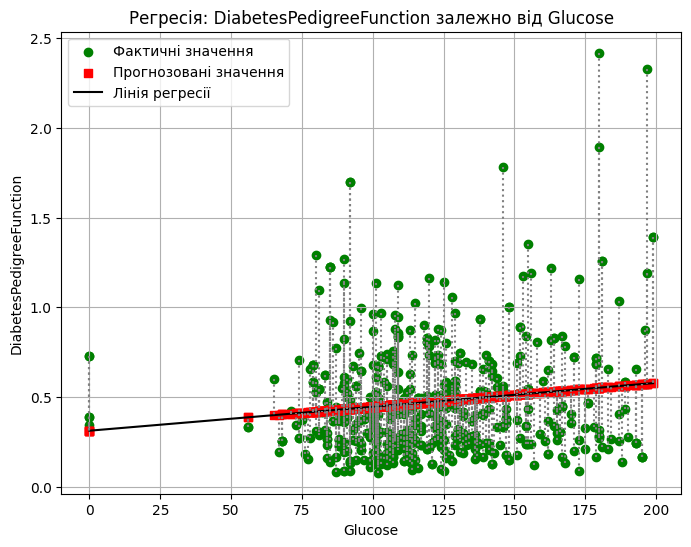

In [ ]:
# Візуалізація регресії
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='green', label='Фактичні значення')
plt.scatter(X_test, y_pred, color='red', marker='s', label='Прогнозовані значення')

x_line = np.linspace(min(X_test), max(X_test), 100).reshape(-1, 1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, color='black', label='Лінія регресії')

for i in range(len(y_test)):
    plt.plot([X_test[i], X_test[i]], [y_test[i], y_pred[i]], color='gray', linestyle='dotted')

plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title(f"Регресія: {feature_y} залежно від {feature_x}")
plt.legend()
plt.grid(True)
plt.show()